# Análisis Estadístico de Dataset de aplicaciones del Google Play Store al 2019

**Autor:** Gerardo Rendón

**Fecha:** 22/03/2020

**Original Dataset: https://www.kaggle.com/lava18/google-play-store-apps

## Descripción de Datos

0. [string] [cualitativa]   App          -> Nombre de la aplicación
1. [string] [cualitativa]   Category     -> Categoría o Genero principal de la aplicación
2. [float]  [cuantitativa]  Rating       -> Clasificación media hecha por usuarios (desde que fue scrapeada la información)
3. [float]  [cuantitativa]  Reviews      -> Número de clasificaciones totales de la aplicación
4. [string] [cuantitativa]  Size         -> Tamaño de la aplicación
5. [string] [cualitativa]   Installs     -> Número de instalaciones hecha en dispositivos
6. [string] [cualitativa]   Type         -> Tipo de aplicación (Gratis o Pagada)
7. [string] [cuantitativa]  Price        -> Precio de la aplicación
8. [string] [cualitativa]   Content      -> Clasificación de contenido, a que grupo esta hecha la aplicación
9. [string] [cualitativa]   Genres       -> Generos de la aplicación, una aplicación puede tener multiples generos
10. [string] [cuantitativa] Last Updated -> Fecha de ultima actualización en el play store
11. [string] [cualitativa]  Current      -> Número de version de la aplicación
12. [string] [cualitativa]  Android      -> Versión de android para la cual fue hecha la aplicación

In [3]:
# Importación de Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

In [13]:
# Carga de Datos
apps = pd.read_csv('googleplaystore.csv')
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Limpieza de Datos

In [14]:
# Change to snake_case for dot notation
apps.columns = apps.columns.str.strip().str.lower().str.replace(' ','_')
# Replace Rating NaN with the Mean
apps.fillna(value={'rating': apps.rating.mean()}, inplace=True)
# Drop all NaN
apps.dropna(inplace=True)
# Drop duplicates
apps=apps.drop_duplicates()
# Drop Last Updated, Current Ver and Android Ver. They won't be used
apps.drop(['last_updated', 'current_ver', 'android_ver'], axis=1, inplace=True)
# Drop The content_rating of Adults only and Unrated. Very small sample
apps.content_rating.replace("Adults only 18+", np.nan, inplace=True)
apps.content_rating.replace("Unrated", np.nan, inplace=True)
apps.dropna(inplace=True)
# Convert the size into numeric
apps['num_size'] = apps['size']
apps.num_size.replace('Varies with device', np.nan, inplace = True )
apps.num_size=apps.num_size.str.extract(r'([\d\.]+)', expand=False).astype(float) * \
    apps.num_size.str.extract(r'([kM]+)', expand=False).fillna(1).replace(['k','M'],[1,1000]).astype(int)
# Convert values to float
apps['installs']=apps['installs'].str.replace(r'\D','').astype(float)
apps['price']=apps['price'].str.replace('$','').astype(float)
apps['reviews']=apps['reviews'].astype(float)

## Análisis Univariado

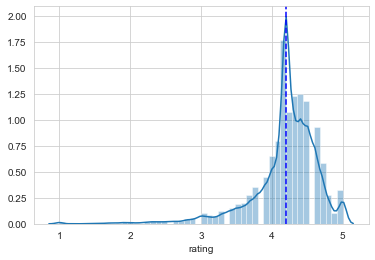

In [15]:
# Distrubución de la califación media recibida
sns.distplot(apps.rating)
plt.axvline(np.median(apps.rating),color='b', linestyle='--')

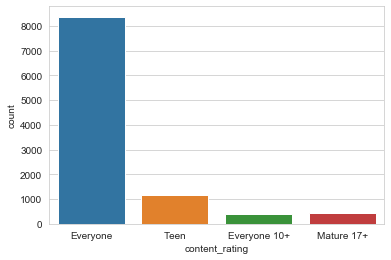

In [16]:
# Distrubición de la califación de contenido
sns.countplot(apps.content_rating)

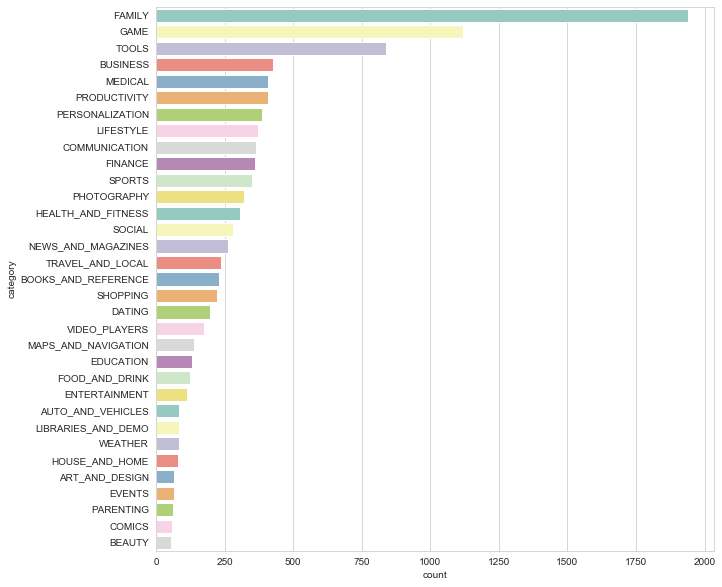

In [17]:
# Distrubucion de la categoria principal de las aplicaciones
plt.figure(figsize=(10,10))
sns.countplot(y="category", data=apps, palette="Set3", order = apps['category'].value_counts().index)

## Análisis Bivariado

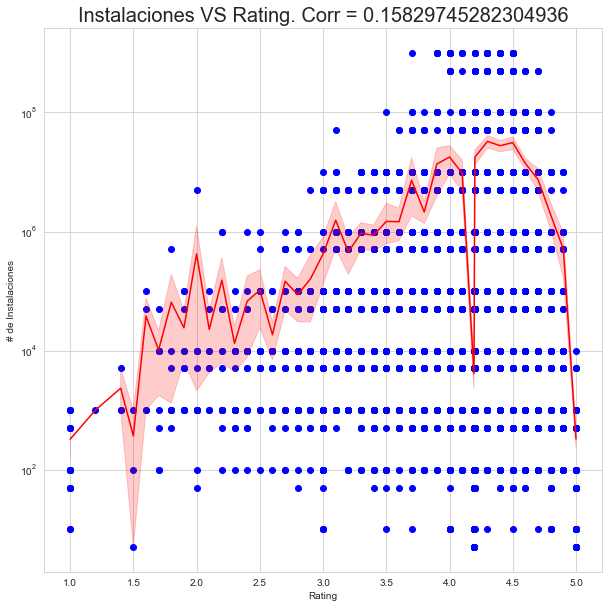

In [73]:
# Relacion entre Califacion y numero de instalaciones
corr = st.spearmanr(apps['rating'],apps['installs'])
plt.figure(figsize=(10,10))
plt.scatter( x=apps.rating, y=apps.installs , color = 'blue')
g = sns.lineplot(x=apps.rating, y=apps.installs,color="red", data=apps) 
plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('# de Instalaciones')
plt.title(f'Instalaciones VS Rating. Corr = {corr.correlation}',size = 20)
plt.show()

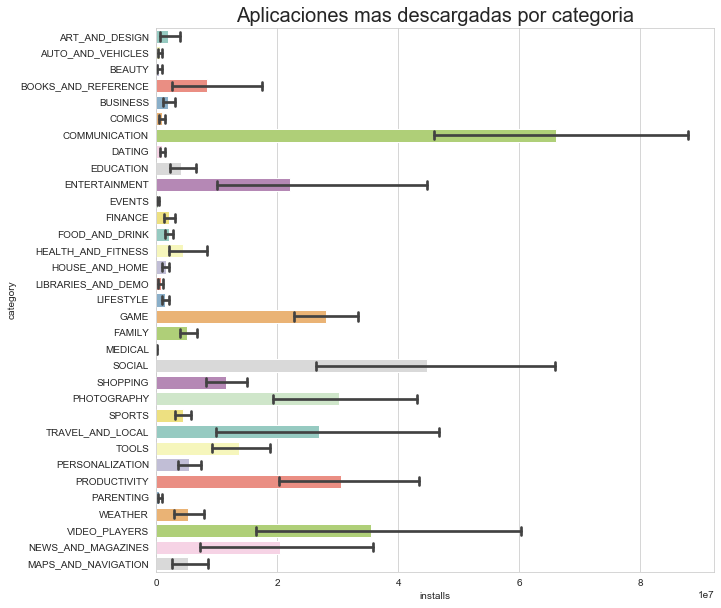

In [63]:
# Relacion entre # de instalaciones y categoria principal
plt.figure(figsize=(10,10))
plt.title(f'Aplicaciones mas descargadas por categoria',size = 20)
sns.barplot(x=apps.installs, y=apps.category, palette="Set3", capsize=.5)

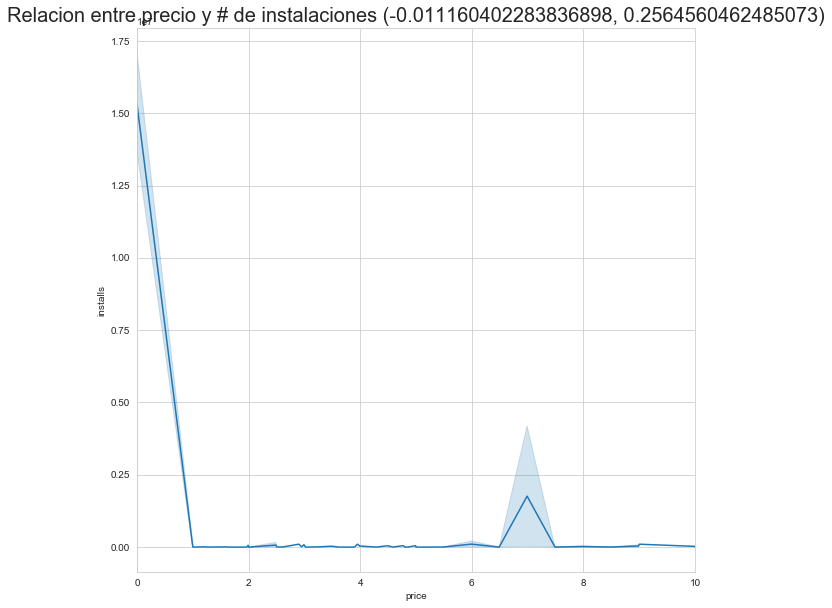

In [66]:
# Relacion entre precio y # instalaciones, mostrando unicamente apps menor a #10
plt.figure(figsize=(10,10))
corr = st.pearsonr(apps['installs'],apps['price'])
g = sns.lineplot(x="price", y="installs", data=apps)
g.set(xlim=(0, 10))
plt.title(f'Relacion entre precio y # de instalaciones {corr}',size = 20)
plt.show()

## Multivariado

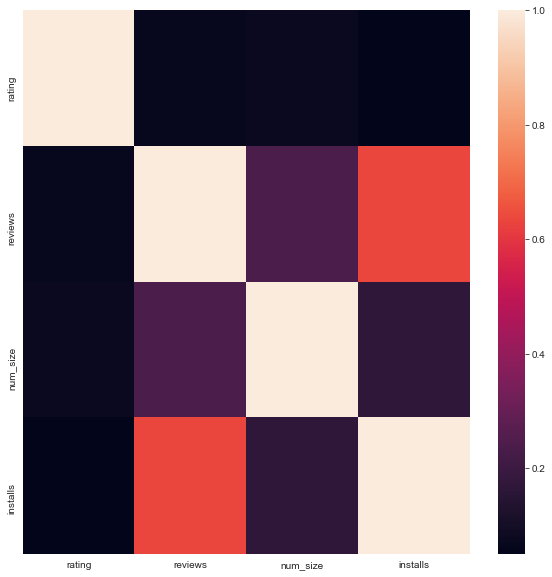

In [69]:
# Correlacion entre valores numericos
plt.figure(figsize=(10,10))
sns.heatmap(apps[['rating', 'reviews', 'num_size', 'installs']].astype('float').corr())

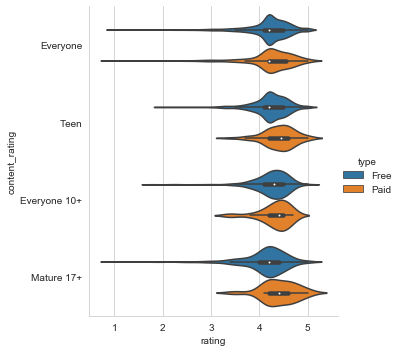

In [84]:
# Relacion entre calificaciones, Tipo de aplicacion y si es gratis o pagada
sns.catplot(x="rating", y="content_rating", hue="type", kind="violin", data=apps)

# Conclusiones
1. Si vas hacer una app hazla gratis o max 1 dolar
2. Si vas hacer exploracion de datos, busca uno que no sea tan incomodo